# Amount of Rainfall Prediction using Regression models

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/rainfall in india.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
df.shape

(3887, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  3887 non-null   object 
 1   YEAR         3887 non-null   int64  
 2   JAN          3885 non-null   float64
 3   FEB          3885 non-null   float64
 4   MAR          3883 non-null   float64
 5   APR          3885 non-null   float64
 6   MAY          3886 non-null   float64
 7   JUN          3884 non-null   float64
 8   JUL          3883 non-null   float64
 9   AUG          3885 non-null   float64
 10  SEP          3884 non-null   float64
 11  OCT          3883 non-null   float64
 12  NOV          3882 non-null   float64
 13  DEC          3881 non-null   float64
 14  ANNUAL       3872 non-null   float64
 15  Jan-Feb      3884 non-null   float64
 16  Mar-May      3882 non-null   float64
 17  Jun-Sep      3881 non-null   float64
 18  Oct-Dec      3880 non-null   float64
dtypes: flo

In [5]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,3887.000000,3885.000000,3885.000000,3883.000000,3885.000000,3886.000000,3884.000000,3883.000000,3885.000000,3884.000000,3883.000000,3882.000000,3881.000000,3872.000000,3884.000000,3882.000000,3881.000000,3880.000000
mean,1958.221250,18.909833,22.165740,27.454365,41.072252,79.227586,214.869902,338.604172,288.736371,196.910247,87.588823,33.837816,17.057228,1361.243285,41.082878,147.419835,1038.634939,138.315541
std,33.139584,33.790445,36.571112,47.818302,67.812487,119.355452,226.145284,266.648228,189.613004,136.400297,93.031482,62.677156,41.071189,885.605666,60.263823,200.307760,704.438118,153.514971
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,2.400000,0.600000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.500000,0.500000,0.900000,2.800000,7.900000,67.300000,171.450000,154.600000,100.375000,13.000000,0.500000,0.100000,785.025000,3.800000,21.825000,558.700000,30.875000
50%,1958.000000,5.700000,6.600000,7.300000,14.000000,33.000000,130.150000,279.000000,257.400000,172.900000,58.500000,8.000000,2.400000,1086.300000,18.950000,68.650000,861.200000,90.600000
75%,1987.000000,22.100000,27.300000,30.700000,45.500000,83.850000,262.000000,407.750000,376.700000,265.400000,135.700000,36.375000,14.700000,1543.225000,50.500000,169.750000,1253.200000,190.950000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [6]:

df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             2
FEB             2
MAR             4
APR             2
MAY             1
JUN             3
JUL             4
AUG             2
SEP             3
OCT             4
NOV             5
DEC             6
ANNUAL         15
Jan-Feb         3
Mar-May         5
Jun-Sep         6
Oct-Dec         7
dtype: int64

In [7]:
df.fillna(method='bfill',inplace=True)

In [8]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['SUBDIVISION'].value_counts()

EAST RAJASTHAN                        115
WEST MADHYA PRADESH                   115
NORTH INTERIOR KARNATAKA              115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
SOUTH INTERIOR KARNATAKA              115
EAST UTTAR PRADESH                    115
ASSAM & MEGHALAYA                     115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                       

In [11]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909])

In [12]:
df.SUBDIVISION.unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA'], dtype=object)

## Visualizing the dataset

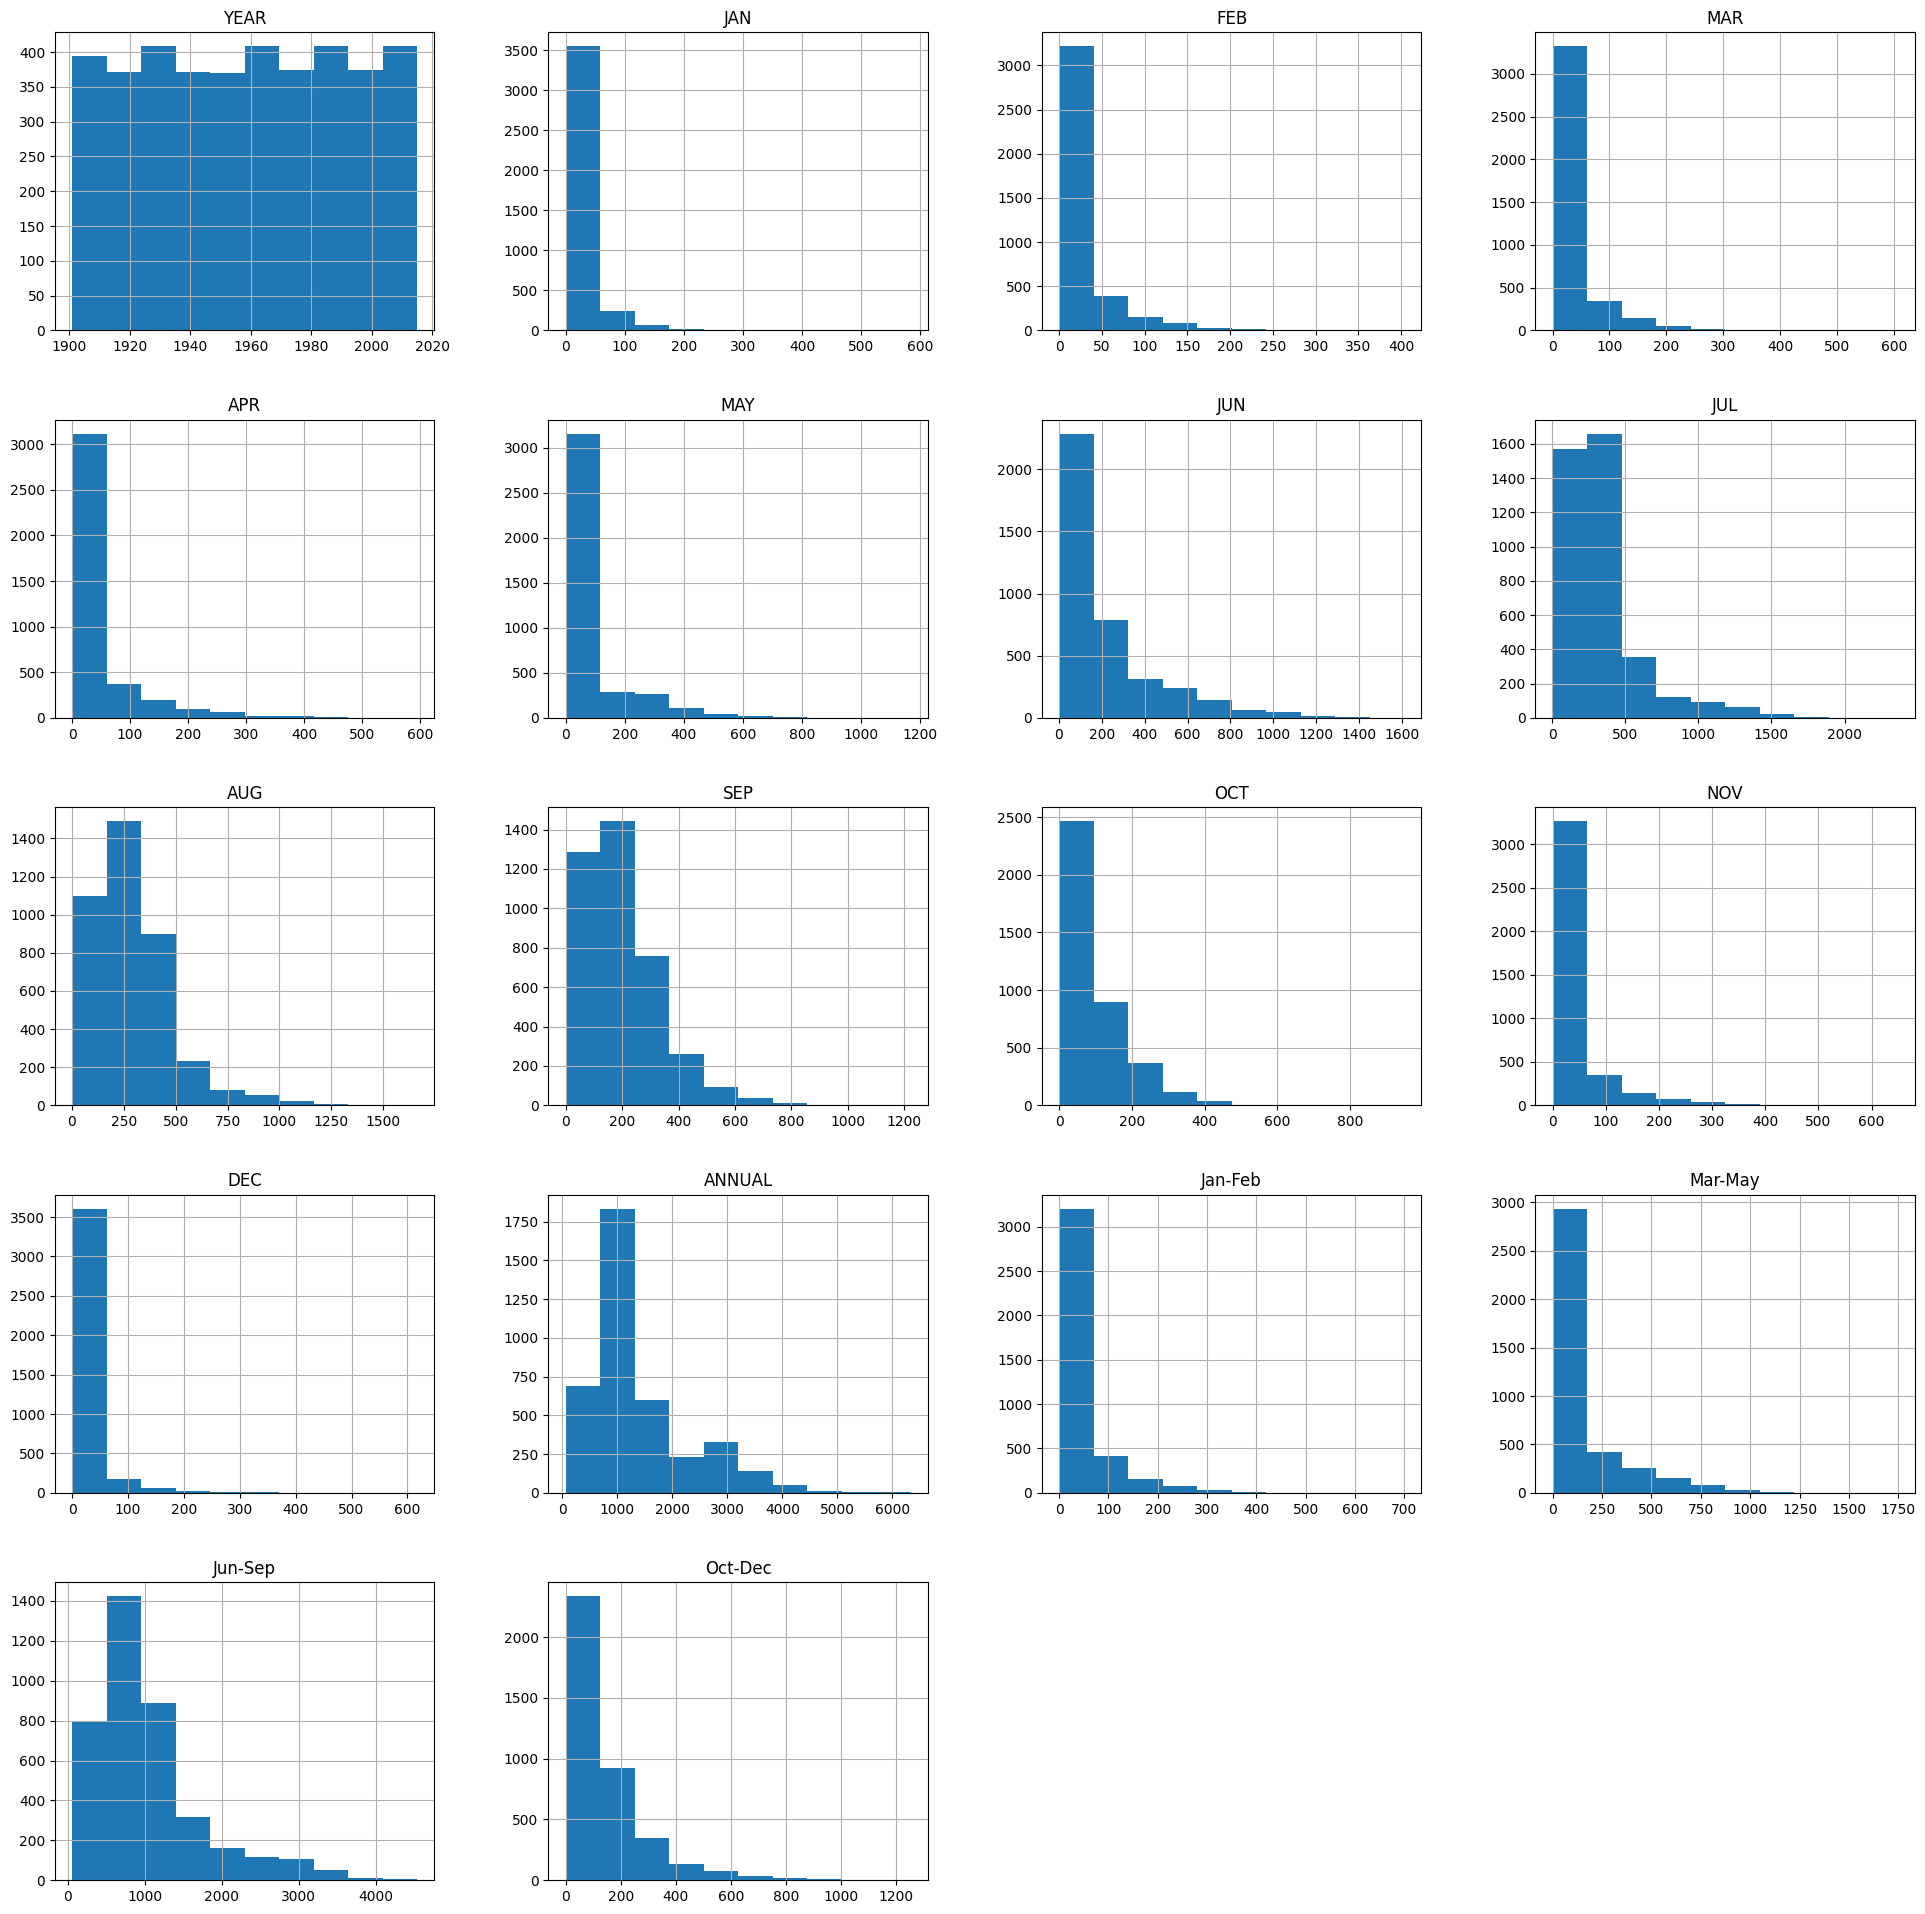

In [13]:
df.hist(figsize=(24,24));

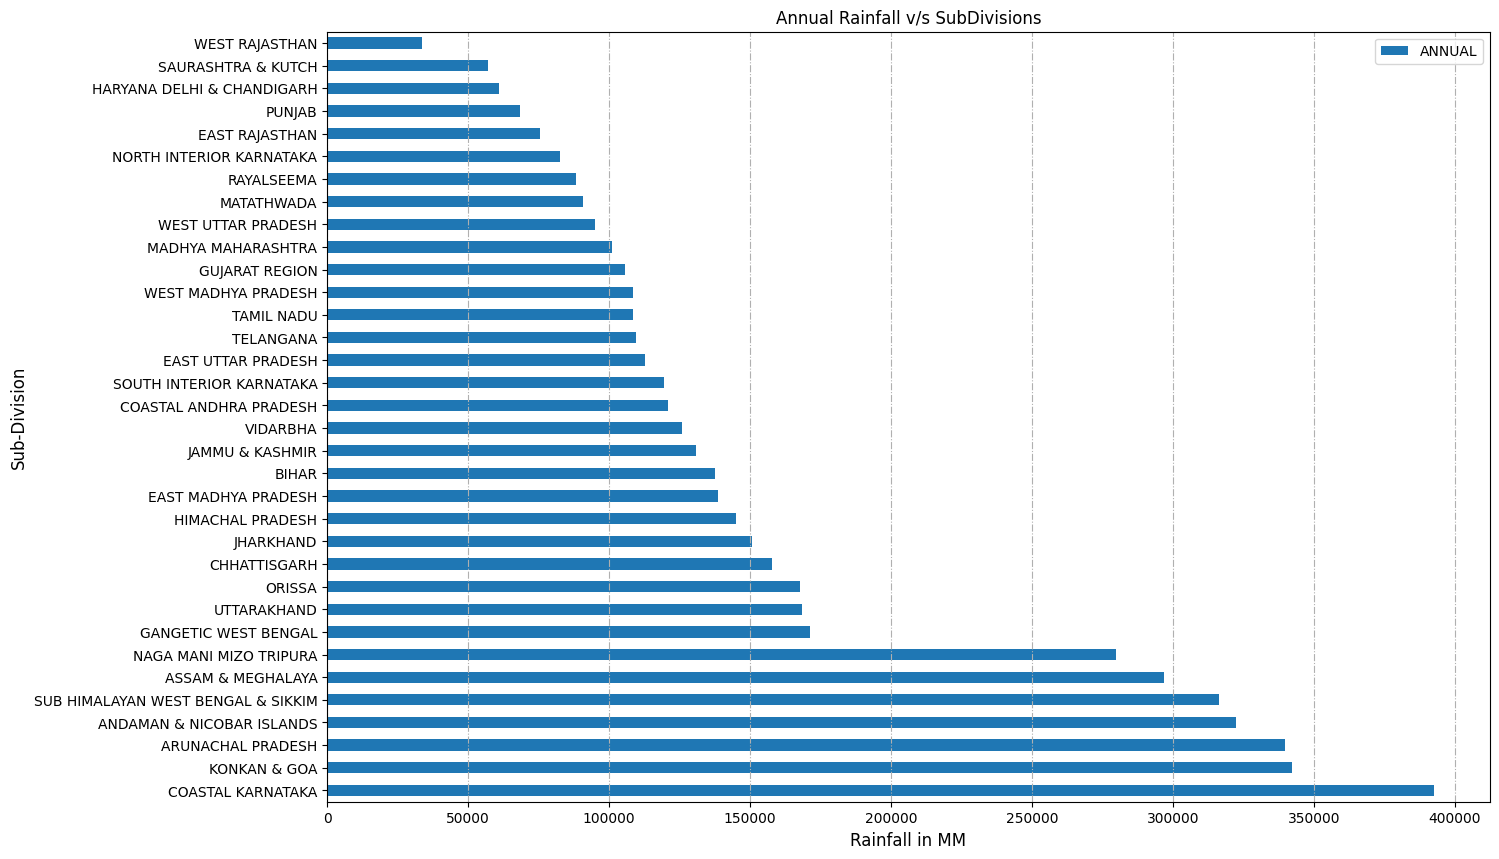

In [14]:
df[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

<ipython-input-15-64cf992d7485>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")


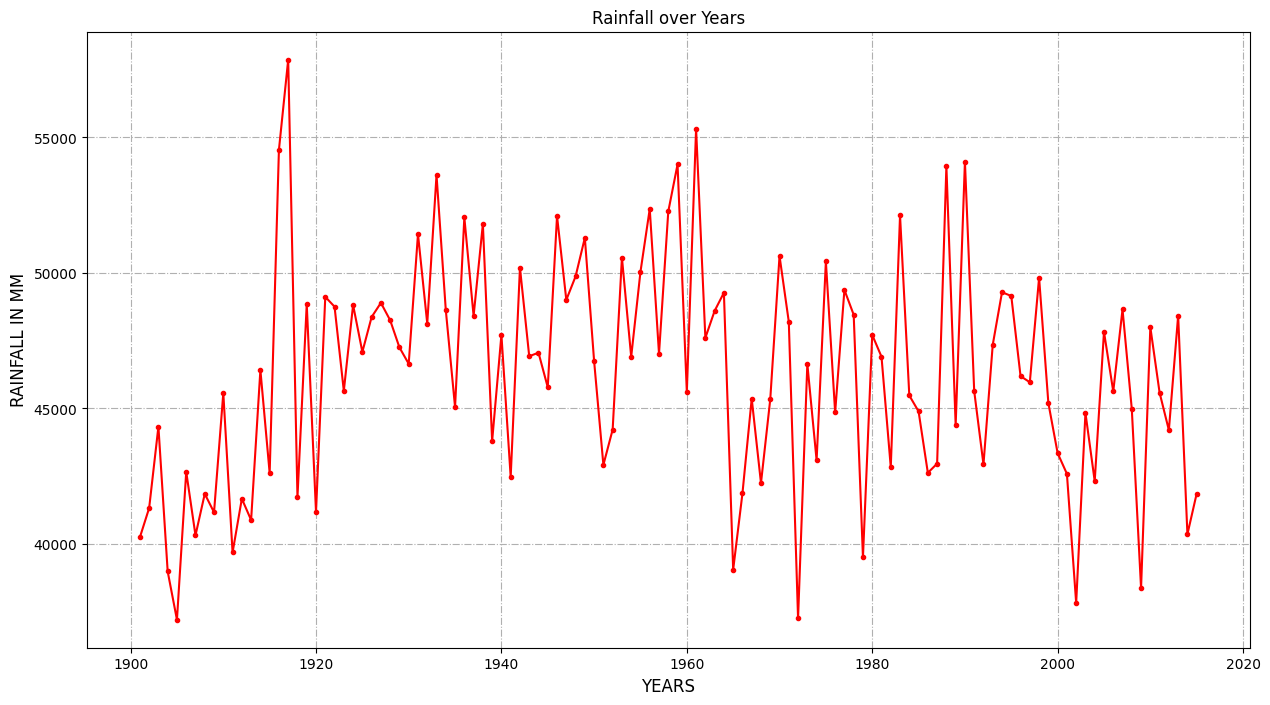

In [15]:
plt.figure(figsize=(15,8))
df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

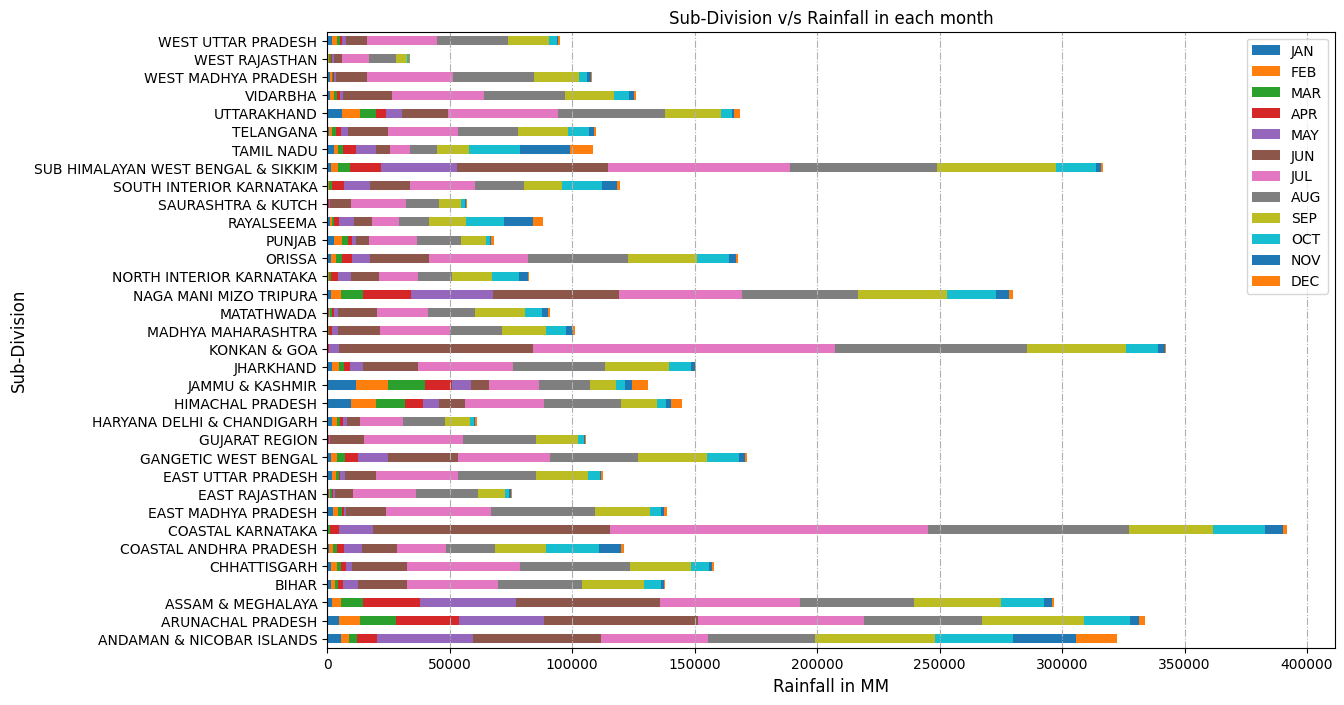

In [16]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
YEAR,1.000000,-0.049201,-0.019677,0.022538,0.009234,0.007683,-0.011065,-0.013928,0.005350,-0.011926,0.007738,-0.017265,-0.015863,-0.008958,-0.039464,0.012140,-0.009532,-0.006275
JAN,-0.049201,1.000000,0.466372,0.411304,0.222171,0.141304,-0.029891,-0.043425,0.021774,0.034833,0.019887,0.078232,0.239079,0.123506,0.843778,0.256634,-0.013208,0.107926
FEB,-0.019677,0.466372,1.000000,0.588000,0.381366,0.228551,0.050298,0.024944,0.080199,0.084417,0.010526,-0.009754,0.152872,0.210254,0.868263,0.407178,0.063854,0.043385
MAR,0.022538,0.411304,0.588000,1.000000,0.571679,0.388697,0.174074,0.094588,0.135006,0.179542,0.089758,0.008894,0.147616,0.337346,0.587386,0.663610,0.163197,0.097644
APR,0.009234,0.222171,0.381366,0.571679,1.000000,0.677039,0.445185,0.248373,0.250687,0.390488,0.351495,0.128587,0.135111,0.575650,0.355978,0.877374,0.380408,0.300292
MAY,0.007683,0.141304,0.228551,0.388697,0.677039,1.000000,0.566982,0.324280,0.344440,0.520697,0.518810,0.318825,0.250414,0.700569,0.217881,0.913959,0.498240,0.509438
JUN,-0.011065,-0.029891,0.050298,0.174074,0.445185,0.566982,1.000000,0.747678,0.682612,0.587302,0.443441,0.143881,0.060478,0.889232,0.013824,0.529692,0.901179,0.341960
JUL,-0.013928,-0.043425,0.024944,0.094588,0.248373,0.324280,0.747678,1.000000,0.699319,0.521876,0.261734,-0.019678,-0.035075,0.806421,-0.009163,0.300626,0.907246,0.140230
AUG,0.005350,0.021774,0.080199,0.135006,0.250687,0.344440,0.682612,0.699319,1.000000,0.507431,0.255850,0.001576,-0.001542,0.772839,0.060993,0.322570,0.850627,0.153604
SEP,-0.011926,0.034833,0.084417,0.179542,0.390488,0.520697,0.587302,0.521876,0.507431,1.000000,0.421982,0.172828,0.128717,0.740307,0.070789,0.484315,0.716369,0.359787


<ipython-input-18-2b948c0c3eb5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


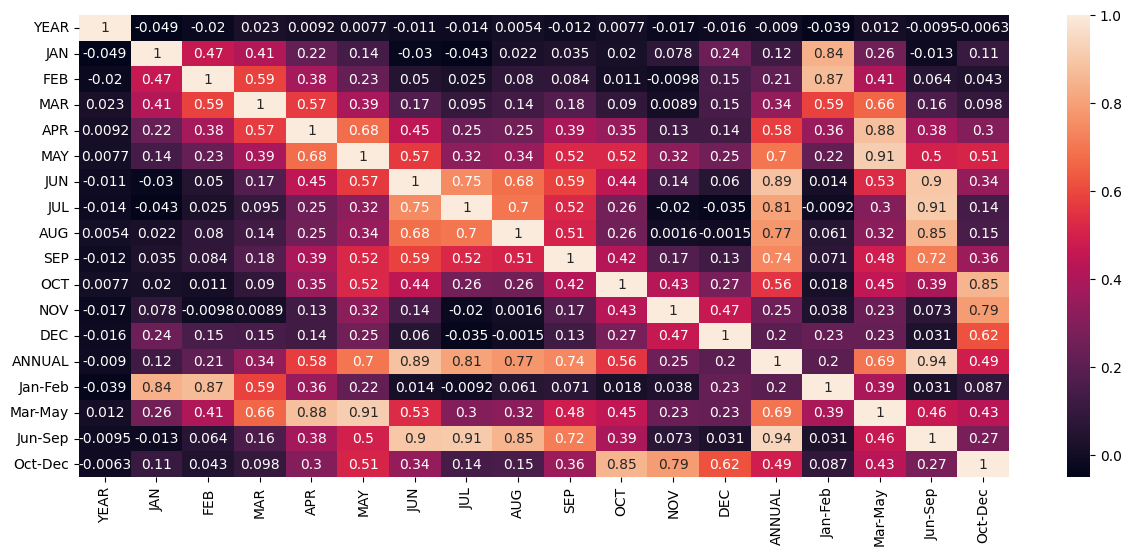

In [18]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Label Encoding:

In [19]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["SUBDIVISION"] = Encoder.fit_transform(df["SUBDIVISION"])

In [20]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Removing Outliers:

Column =  SUBDIVISION


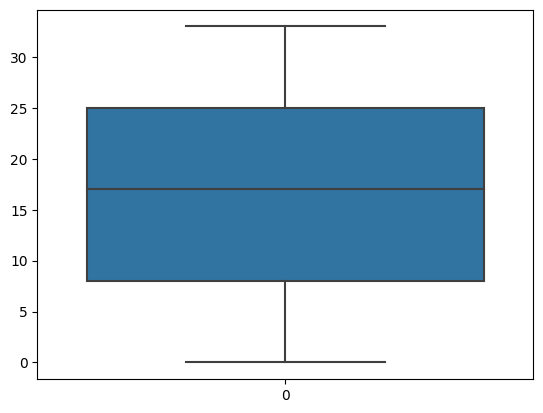

Column =  YEAR


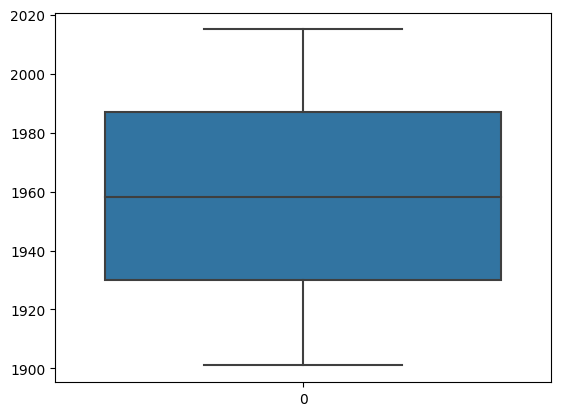

Column =  JAN


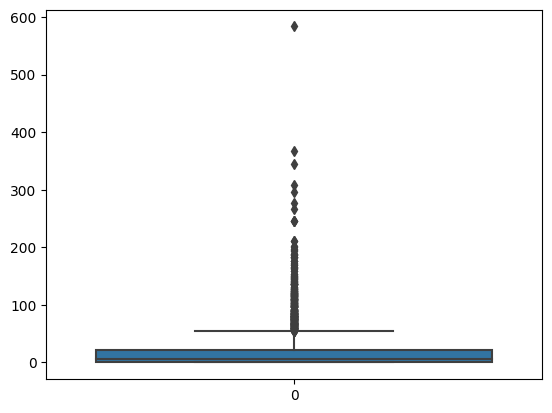

Column =  FEB


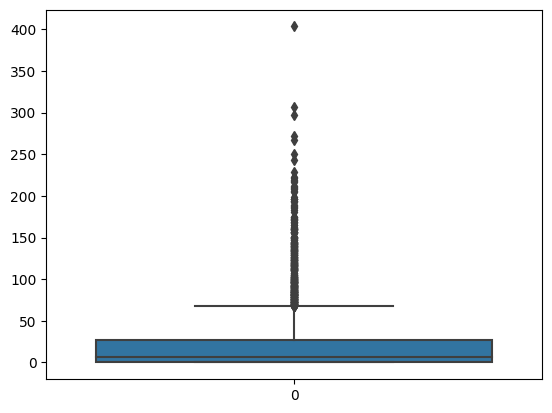

Column =  MAR


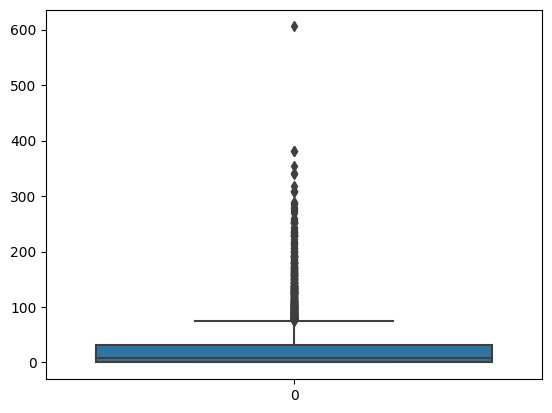

Column =  APR


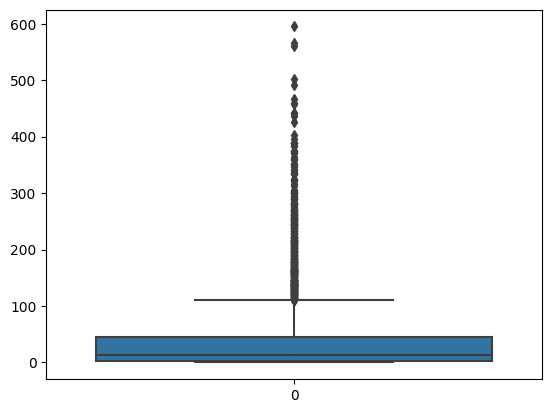

Column =  MAY


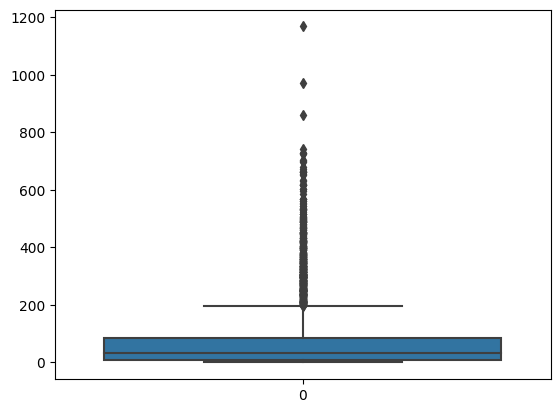

Column =  JUN


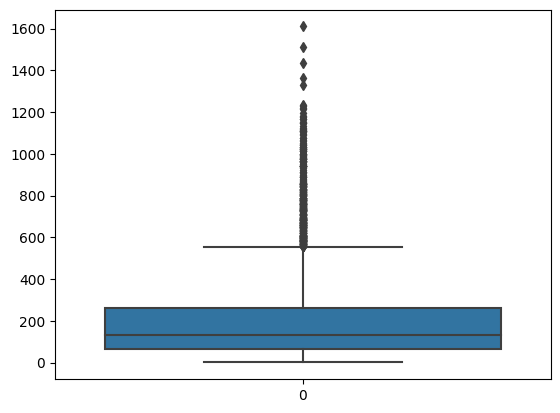

Column =  JUL


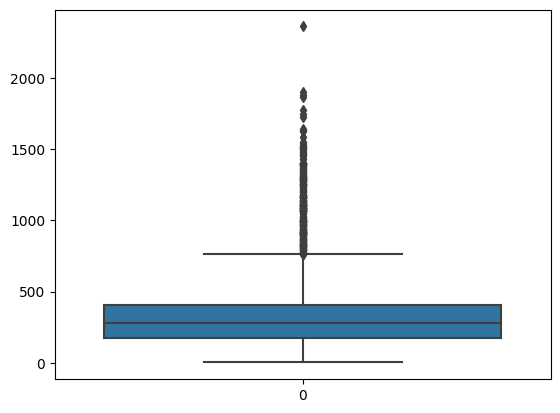

Column =  AUG


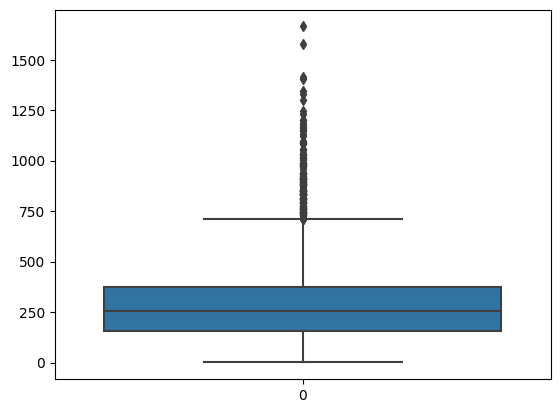

Column =  SEP


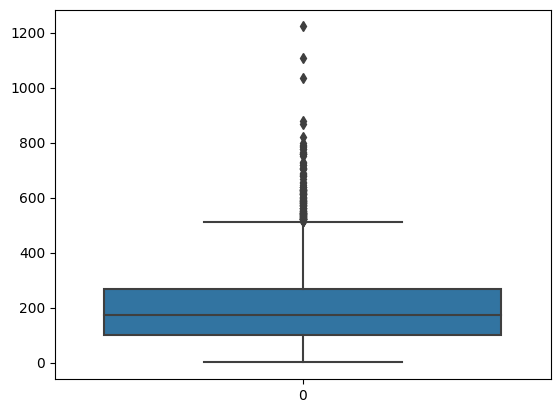

Column =  OCT


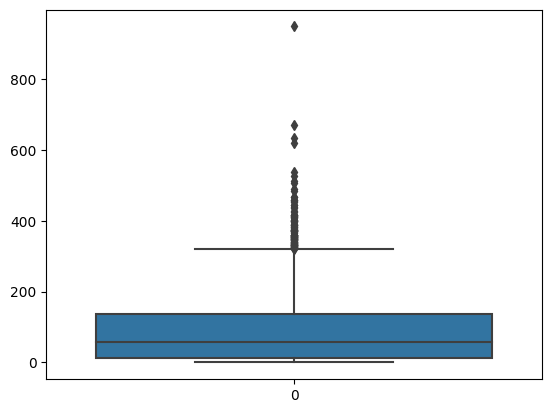

Column =  NOV


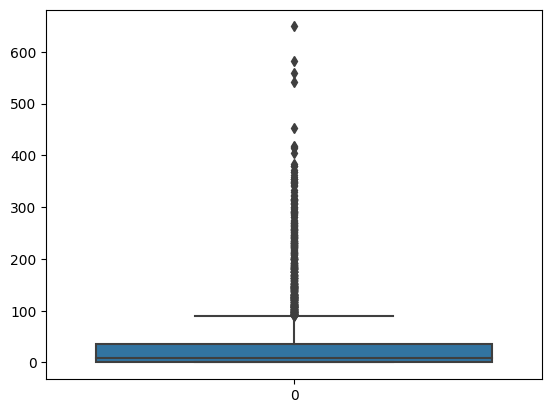

Column =  DEC


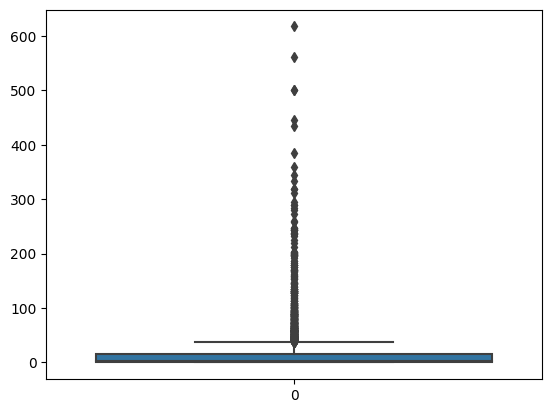

Column =  ANNUAL


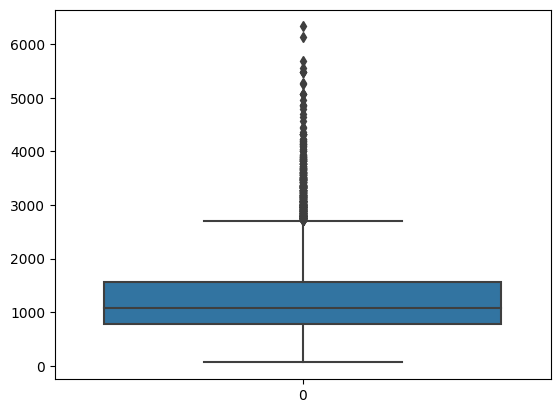

Column =  Jan-Feb


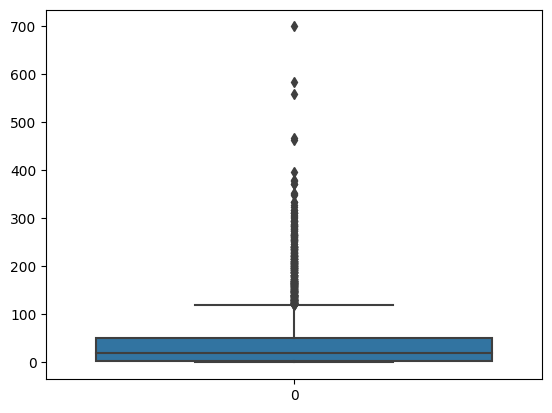

Column =  Mar-May


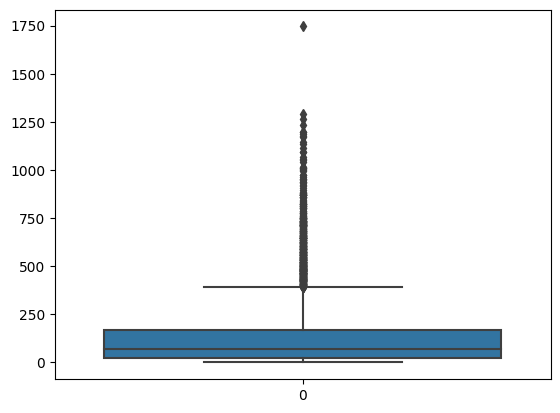

Column =  Jun-Sep


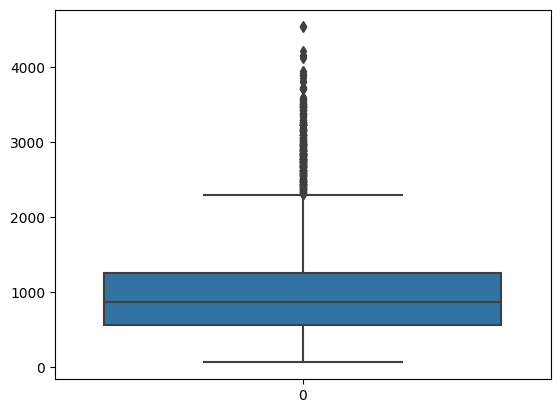

Column =  Oct-Dec


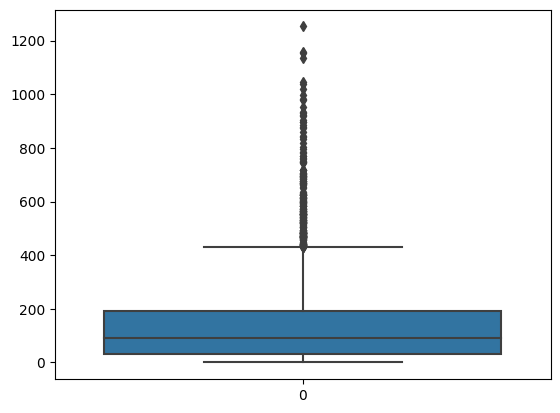

In [21]:
#Plotting Boxplot for numerical value to identify whether outliers present or not
for i in df:
  print('Column = ',i)
  sns.boxplot(df[i])
  plt.show()

In [22]:
Q1=df['ANNUAL'].quantile(0.25)
Q3=df['ANNUAL'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df=df[(df['ANNUAL']<UL) & (df['ANNUAL']>LL)]

In [23]:
df.shape

(3421, 19)

In [24]:
from datetime import date
df['NO OFYEAR'] = date.today().year - df['YEAR']

<ipython-input-24-c6f53b52a45c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NO OFYEAR'] = date.today().year - df['YEAR']


In [25]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,NO OFYEAR
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,118
5,0,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9,117
9,0,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4,112
11,0,1913,84.8,0.5,1.3,2.5,190.7,530.0,280.8,205.8,580.1,288.8,133.0,67.5,2365.8,85.3,194.5,1596.7,489.3,110
15,0,1917,8.0,3.6,112.0,4.5,295.9,301.1,394.8,437.4,471.8,238.1,108.3,236.9,2612.4,11.6,412.4,1605.1,583.3,106


## Splitting the Data for Training Testing.

In [26]:
x=df.drop(columns=['ANNUAL','YEAR'])
y=df['ANNUAL']

In [27]:
x.head()

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,NO OFYEAR
4,0,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,1.3,309.7,1624.9,630.8,118
5,0,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,36.6,556.1,1465.8,475.9,117
9,0,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,8.4,449.8,1553.6,675.4,112
11,0,84.8,0.5,1.3,2.5,190.7,530.0,280.8,205.8,580.1,288.8,133.0,67.5,85.3,194.5,1596.7,489.3,110
15,0,8.0,3.6,112.0,4.5,295.9,301.1,394.8,437.4,471.8,238.1,108.3,236.9,11.6,412.4,1605.1,583.3,106


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2394, 18)
(1027, 18)
(2394,)
(1027,)


# Visualizing the results

In [31]:
import plotly.express as px

In [32]:
fig=px.scatter(df,x=df['SUBDIVISION'], y=df['ANNUAL'],trendline='ols',trendline_color_override='red')
fig.show()
results = px.get_trendline_results(fig)
print(results)

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


In [33]:
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     347.2
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           6.85e-74
Time:                        19:20:38   Log-Likelihood:                -26196.
No. Observations:                3421   AIC:                         5.240e+04
Df Residuals:                    3419   BIC:                         5.241e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1409.8534     18.542     76.037      0.000    1373.500    1446.207
x1           -17.3091      0.929    -18.635      0.000     -19.130     -15.488
==============================================================================
Omnibus:                      512.921   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.577
Skew:                           1.050   Prob(JB):                    2.88e-173
Kurtosis:                       4.080   Cond. No.                         42.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
fig=px.scatter(df,x=df['YEAR'], y=df['ANNUAL'],trendline='ols',trendline_color_override='red')
fig.show()
results = px.get_trendline_results(fig)
print(results)

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


In [35]:
fig=px.scatter(df,x=df['AUG'], y=df['ANNUAL'],trendline='ols',trendline_color_override='red')
fig.show()
results = px.get_trendline_results(fig)
print(results)

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


## Scaling the data

In [36]:
#Scaling the data
from sklearn.preprocessing import RobustScaler

In [37]:
rs=RobustScaler()
x_train_scl=rs.fit_transform(x_train)
x_test_scl=rs.transform(x_test)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error

## Fitting Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR_model = LR.fit(x_train_scl,y_train)
LR_model

LinearRegression()

In [40]:
y_pred = LR_model.predict(x_test_scl)
y_pred_train = LR_model.predict(x_train_scl)

In [41]:
from math import sqrt

## Evaluation metrics

In [42]:
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('MSE = ',mse)
mape=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE = ',mape)
mae=mean_absolute_error(y_test,y_pred)
print('MAE =',mae)



MSE =  17.282893269004088
MAPE =  0.0012377277897482222
MAE = 1.4026635120204174


In [43]:
LR_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE = ',LR_rmse)

RMSE =  17.282893269004088


In [44]:
error=sqrt(mse)
error

4.157269929774117

In [45]:
r2_score(y_train,y_pred_train)

0.9999773369945448

In [46]:
r2_score(y_test,y_pred)

0.9990470027134594

## Fitting Decission Tree Regression

In [47]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT_model = DT.fit(x_train_scl,y_train)
DT_model

DecisionTreeRegressor()

In [48]:
y_pred = DT_model.predict(x_test_scl)
y_pred_train = DT_model.predict(x_train_scl)

In [49]:
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('MSE = ',mse)
mape=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE = ',mape)
mae=mean_absolute_error(y_test,y_pred)
print('MAE =',mae)


MSE =  99.91395889506
MAPE =  0.063134346421302
MAE = 65.82882181110028


In [50]:
error=sqrt(mse)
error

9.995697018970713

In [51]:

r2_score(y_test,y_pred)

0.9681498778010226

# Regularization Techniques
###-Ridge Regression:

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

## Tunning

In [53]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train_scl,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 5, 10, 20,
                                   30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [54]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-14.789731607600398


In [55]:
print("Best Parameter for Ridge:",ridge_regressor.best_estimator_)

Best Parameter for Ridge: Ridge(alpha=5)


In [56]:
ridge=Ridge(alpha=100.0)

In [57]:
ridge_model=ridge.fit(x_train_scl,y_train)


In [58]:
ridge_model

Ridge(alpha=100.0)

In [59]:
y_pred = ridge_model.predict(x_test_scl)
y_pred_train = ridge_model.predict(x_train_scl)

In [60]:
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('MSE = ',mse)
mape=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE = ',mape)
mae=mean_absolute_error(y_test,y_pred)
print('MAE =',mae)

MSE =  20.2976939702703
MAPE =  0.011965520401746576
MAE = 9.32958037824982


In [61]:
error=sqrt(mse)
error

4.505296213377129

In [62]:
r2_score(y_train,y_pred_train)

0.999576292865514

In [63]:
r2_score(y_test,y_pred)

0.9986855254898491

###-Lasso Regression:

In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [65]:

# create a lasso object
lasso = Lasso(max_iter=10000)

In [66]:
# check for best alpha value using GridSearch
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,1e1,1e2,1e3,1e4,1e5,1e6,1e7]}
lasso_regressor=GridSearchCV(
    lasso,parameter,
    scoring='neg_mean_squared_error',
    cv=5
    )

In [67]:
lasso_model=lasso_regressor.fit(x_train_scl,y_train)

In [68]:
lasso_model

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10.0,
                                   100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                                   10000000.0]},
             scoring='neg_mean_squared_error')

## Tunning

In [69]:
GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10.0,
                                   100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                                   10000000.0]},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10.0,
                                   100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                                   10000000.0]},
             scoring='neg_mean_squared_error')

In [70]:
print("Best Parameter for Lasso:",lasso_regressor.best_estimator_)

Best Parameter for Lasso: Lasso(alpha=0.01, max_iter=10000)


In [71]:
lasso=Lasso(alpha=100.0,max_iter=100000)

# fit into the object
lasso.fit(x_train_scl,y_train)

Lasso(alpha=100.0, max_iter=100000)

In [72]:
y_pred = lasso.predict(x_test_scl)
y_pred_train = lasso.predict(x_train_scl)

In [73]:
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('MSE = ',mse)
mape=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE = ',mape)
mae=mean_absolute_error(y_test,y_pred)
print('MAE =',mae)

MSE =  184.76371805122238
MAPE =  0.205593393948917
MAE = 146.77004671754315


In [74]:
error=sqrt(mse)
error

13.592781836372655

In [75]:
r2_score(y_train,y_pred_train)

0.8877056551602704

In [76]:
r2_score(y_test,y_pred)

0.8910838818566653

## Fitting Linear SVR

In [77]:
from sklearn.svm import LinearSVR

In [78]:
SVR_mod = LinearSVR()
SVR_model = SVR_mod.fit(x_train_scl,y_train)
SVR_model

LinearSVR()

In [79]:
SVR_y_pred = SVR_model.predict(x_test_scl)
SVR_y_pred_train= SVR_model.predict(x_train_scl)

In [80]:
r2_score(y_test,SVR_y_pred)

0.9988244456890908

In [81]:
r2_score(y_train,SVR_y_pred_train)

0.9999309279515805

# Fitting Neural Networks
###MLP Regressor

In [82]:
from sklearn.neural_network import MLPRegressor

In [83]:
NN = MLPRegressor()
NN_model = NN.fit(x_train_scl,y_train)
NN_model

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPRegressor()

In [84]:
NN_y_pred = NN_model.predict(x_test_scl)
NN_y_pred_train = NN_model.predict(x_train_scl)

In [85]:
r2_score(y_test,NN_y_pred)

0.6166845881455115

In [86]:
r2_score(y_train,NN_y_pred_train)

0.5725644900202689

## Fitting Random Forest Regression

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
RF = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [89]:
RF_model=RF.fit(x_train_scl, y_train)
RF_model

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [90]:
RF_y_pred=RF_model.predict(x_test_scl)
RF_y_pred_train=RF_model.predict(x_train_scl)

In [91]:
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('MSE = ',mse)
mape=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE = ',mape)
mae=mean_absolute_error(y_test,y_pred)
print('MAE =',mae)

MSE =  184.76371805122238
MAPE =  0.205593393948917
MAE = 146.77004671754315


In [92]:
error=sqrt(mse)
error


13.592781836372655

In [93]:
r2_score(y_test,RF_y_pred)

0.9809028947052615

In [94]:
r2_score(y_train,RF_y_pred_train)

0.9919404483485026

### Tracking Model Performance
#### R2 scores for each of the models when running on the train/test data split.

|Model Name|R2 score|
|:--|:--
|Decission Tree|96.15|
|Linear Regression|98.70|
|Ridge Regression|97.51|
|Lasso Regression|89.1o|
|Support Vector Reg|94.90|
|Neural Network(MLP)|61.66|
|Random Forest Regression|97.07|